# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datasetPath = 'C:\\Users\\karth\\Machine_Learning\\spamDetection\\dataset\\'
dataset = datasetPath  + 'emails.csv'
print(dataset)

C:\Users\karth\Machine_Learning\spamDetection\dataset\emails.csv


# 1. Understanding the Problem
Before diving into the data, we need to understand what you're solving.

### What is spam detection?

- Spam detection is a binary classification problem (Spam vs. Not Spam).
- Spam emails are unwanted, often fraudulent messages (ads, phishing, etc.).
- Non-spam (ham) emails are legitimate communications.

### How do humans identify spam?

- Subject line: "Win a free iPhone!!!"
- Excessive links: Too many external URLs.
- Unusual sender addresses: Random email addresses.
- Certain words: "limited offer", "urgent", "lottery", etc.

### How should the AI model detect spam?

- Identify word patterns and structures in spam vs. non-spam emails.
- Use text-based features like word frequency, special characters, sender info, etc.

In [3]:
df = pd.read_csv(dataset)

In [4]:
df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [5]:
df.shape

(5728, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [8]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

 There is a potential class imbalance here!!!!!!

In [9]:
# print a random spam & ham emails
print(df[df['spam'] == 1].sample(n=1)[["text", "spam"]].to_string(index= True))
print(df[df['spam'] == 0].sample(n=1)[["text", "spam"]].to_string(index=True))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    text  spam
527  Subject: secretly record all internet activity on any computer . . . c  find out who they are chatting / e - mailing with all those hours !  is your spouse cheating online ?  are your kids talking to dangerous people on instant messenger ?  find out now ! - with big brother instant software download .  click on this link now to see actual screenshots and to order !  to be excluded from future contacts please visit :  http : / / 213 . 139 . 76 . 69 / php / remove . php  jthomason     1
          

# 2. Text preprocessing
- Emails contain unnecessary elements like:
- Punctuation & special characters (!!!, $$$, #1, @gmail.com)
- Stopwords (the, is, and, a, to) – don’t add meaning to spam detection
- Mixed case words (FREE vs. free should be treated the same)
- Extra whitespace (double spaces, newlines)
- Numbers & URLs (important for some models, but should be handled properly)
- Emojis (optional – depends on whether they add meaning)

#### 1. Convert text to lower-case 
Why?
- WIN A PRIZE and win a prize should be treated the same.

In [10]:
df['text'] = df['text'].str.lower()

#### 2. Remove punctuations
Why?
- !!! and free!!! add no meaning to the text.
- URLs like http://win-money.com might be useful, but for now, let’s remove them.
- They don’t provide semantic meaning – URLs are mostly unique and don’t contribute useful patterns for spam detection.
- They prevent model generalization – If we keep URLs as they are, the model might learn specific domains instead of spammy patterns.

In [11]:
import string 
df['text'] = df['text'].str.replace(f"[{string.punctuation}]", " ", regex = True)

#### 3. Remove stop words
Why?
- Words like is, the, and, to, from appear frequently but don’t help detect spam.
- Removing them reduces noise and speeds up processing.

In [12]:
import nltk 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

#### 4.Tokenization (Splitting Text into Words)
Why?
- Splits text into words so the model understands individual terms.
- "Win a free iPhone" → [win, free, iphone]

In [13]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
df['text'] = df['text'].apply(lambda x: word_tokenize(x))

In [15]:
df.head()

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, homes, made, easy...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cds, software,...",1


#### Step 5: Lemmatization (Convert Words to Base Form)
Why?
- Reduces words to their root form:
- "running" → "run"
- "better" → "good"

In [16]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()
df["text"] = df["text"].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.head()

,text,spam
0,"[subject, naturally, irresistible, corporate, ...",1
1,"[subject, stock, trading, gunslinger, fanny, m...",1
2,"[subject, unbelievable, new, home, made, easy,...",1
3,"[subject, 4, color, printing, special, request...",1
4,"[subject, money, get, software, cd, software, ...",1


In [18]:
#printing random emails in spam/ ham
print(df[df['spam'] == 0].sample(n = 1)[['text', 'spam']].to_string(index = True))
print(df[df['spam'] == 1].sample(n = 1)[['text', 'spam']].to_string(index = True))

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           text  spam
4763  [subject, mathworks, molly, reasonably, big, room, 2, 5, people, ok, ebl, 938, vince, molly, carnes, enron, communication, 09, 28, 2000, 03, 10, pm, vince, j, kaminski, hou, ect, ect, enron, cc, subject, mathworks, got, calendar, 18, th, 2, 00, location, many, bring, 2, 3, thanks, molly, carnes, louis, casari, vice

In [19]:
df_original = pd.read_csv(dataset)
df_original['text'].iloc[3423]

'Subject: re : training courses  shirley ,  no problem .  vince  shirley crenshaw  03 / 13 / 2000 12 : 08 pm  to : vince j kaminski / hou / ect @ ect  cc :  subject : training courses  vince :  kevin moore and jose marquez would like to take a course entitled  " wellhead to burnertip " which is scheduled monthly . the first course  available would be may 18 th and the cost would be $ 600 . 00 each .  is this ok ?  thanks !'

In [20]:
import re

# Define regex pattern for emojis
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                           u"\U0001F700-\U0001F77F"  # Alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric symbols
                           u"\U0001F800-\U0001F8FF"  # Supplemental symbols
                           u"\U0001F900-\U0001F9FF"  # Supplemental symbols and pictographs
                           u"\U0001FA00-\U0001FA6F"  # Symbols for sports, tools, etc.
                           u"\U0001FA70-\U0001FAFF"  # Symbols for household objects, etc.
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           "]+", flags=re.UNICODE)

# Find rows containing emojis
df['text'] = df['text'].astype(str)  # Ensures all values are strings
df_with_emojis = df[df['text'].apply(lambda x: bool(emoji_pattern.search(x)))]

# Display rows with emojis
print(df_with_emojis)

Empty DataFrame
Columns: [text, spam]
Index: []


### Exploratory Data Analysis (EDA)

- Text length distribution

In [21]:
df['textLength'] = df['text'].apply(lambda x: len(x.split()))

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

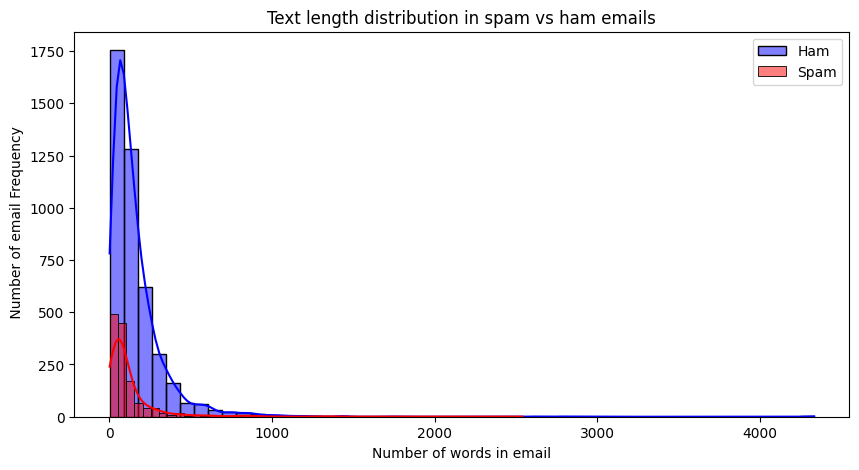

In [23]:
plt.figure(figsize= (10,5))
sns.histplot(df[df['spam'] == 0]['textLength'], bins = 50, label = 'Ham', color = 'blue', kde = True)
sns.histplot(df[df['spam'] == 1]['textLength'],  bins = 50, label = 'Spam', color = 'red', kde = True)
plt.legend()
plt.xlabel("Number of words in email")
plt.ylabel(" Number of email Frequency")
plt.title("Text length distribution in spam vs ham emails")
plt.show()

- Most common word in spam vs ham

In [24]:
from collections import Counter
import nltk 
from wordcloud import WordCloud

In [25]:
spam_words = " ".join(df[df['spam'] == 1]['text']).split()
ham_words = " ".join(df[df['spam'] == 0]['text']).split()

In [26]:
spam_word_freq = Counter(spam_words).most_common(20)
ham_word_freq = Counter(ham_words).most_common(20)

In [27]:
spam_dict = dict(spam_word_freq)
ham_dict = dict(ham_word_freq)

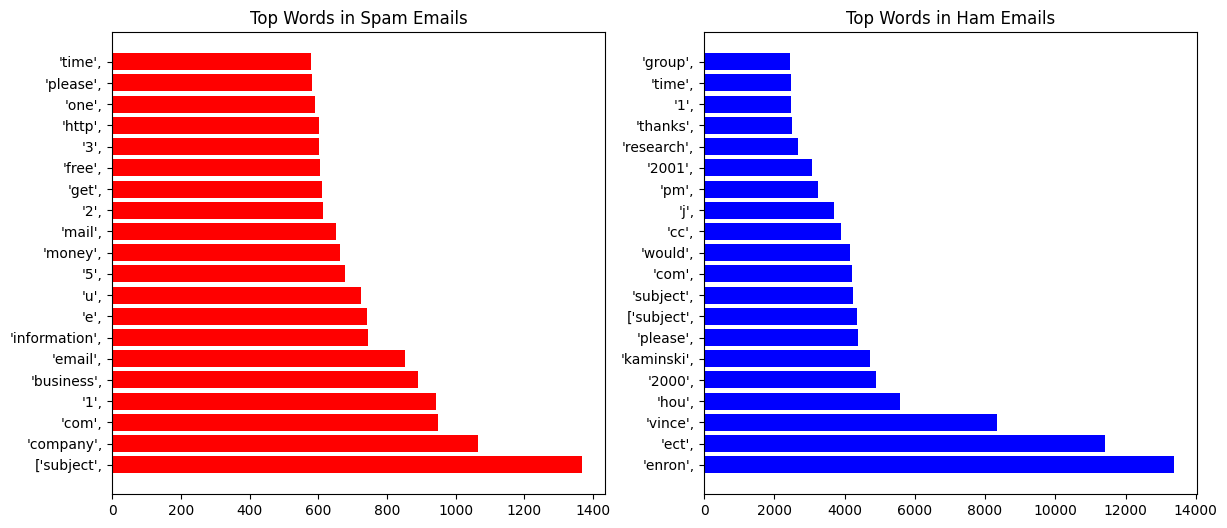

In [28]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].barh(list(spam_dict.keys()), list(spam_dict.values()), color="red")
ax[0].set_title("Top Words in Spam Emails")

ax[1].barh(list(ham_dict.keys()), list(ham_dict.values()), color="blue")
ax[1].set_title("Top Words in Ham Emails")

plt.show()

- Word clouds for spam vs ham

In [29]:
spam_wc = WordCloud(width = 500, height = 300, background_color = 'white').generate(" ".join(spam_words))
ham_wc = WordCloud(width = 500, height = 300, background_color = 'white').generate(" ".join(ham_words))

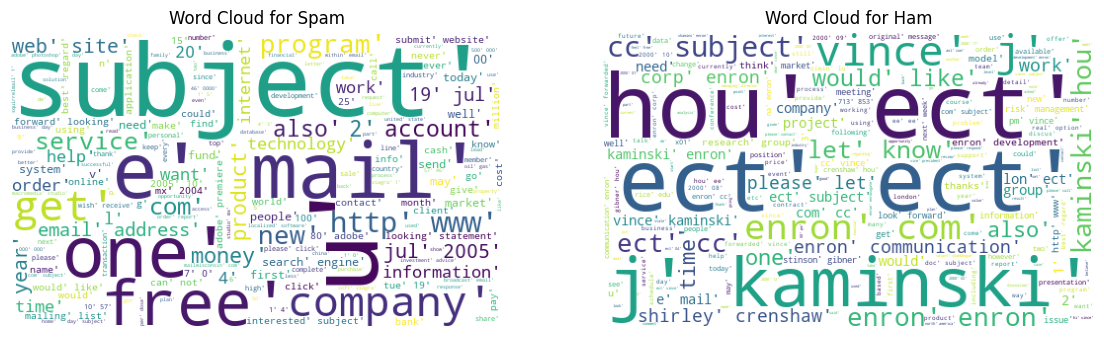

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].imshow(spam_wc)
ax[0].set_title("Word Cloud for Spam")
ax[0].axis("off")

ax[1].imshow(ham_wc)
ax[1].set_title("Word Cloud for Ham")
ax[1].axis("off")

plt.show()

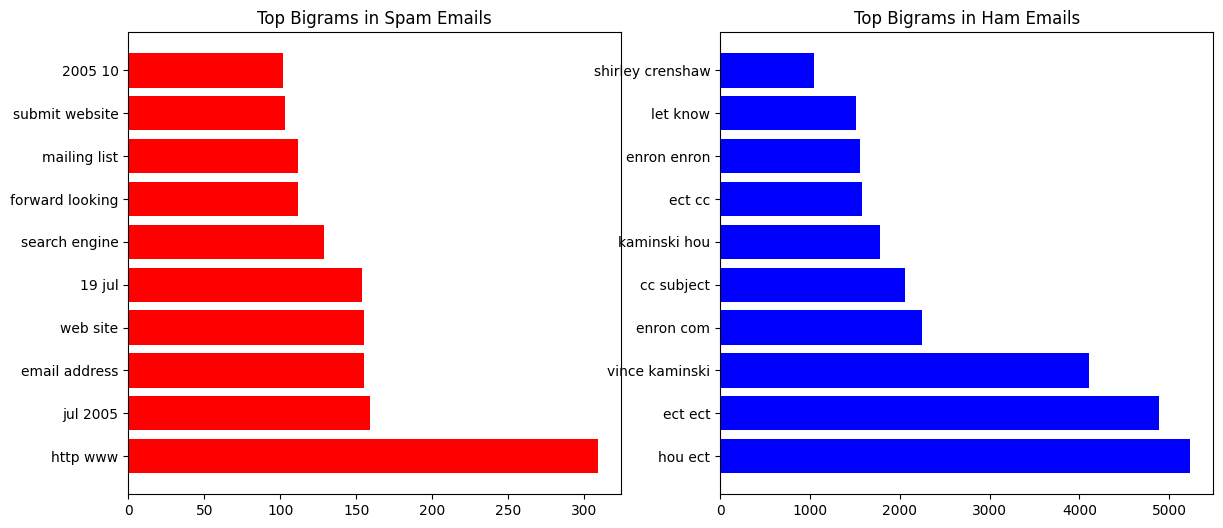

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top N-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), n=10):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get bigrams
spam_bigrams = get_top_ngrams(df[df["spam"] == 1]["text"], ngram_range=(2, 2))
ham_bigrams = get_top_ngrams(df[df["spam"] == 0]["text"], ngram_range=(2, 2))

# Convert to dict for visualization
spam_bigram_dict = dict(spam_bigrams)
ham_bigram_dict = dict(ham_bigrams)

# Plot bigrams
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].barh(list(spam_bigram_dict.keys()), list(spam_bigram_dict.values()), color="red")
ax[0].set_title("Top Bigrams in Spam Emails")

ax[1].barh(list(ham_bigram_dict.keys()), list(ham_bigram_dict.values()), color="blue")
ax[1].set_title("Top Bigrams in Ham Emails")

plt.show()


# 3. Feature Extraction

##### What is Bag-of-Words (BoW)?
- Represents text as a word count matrix.
- Ignores word order and only focuses on how many times each word appears.

Example:
Email 1: "Free money now! Claim your prize!"
Email 2: "Claim your free prize now!"

BoW Representation (word counts):
Email	Free	Money	Now	Claim	Your	Prize
1	1	1	1	1	1	1
2	1	0	1	1	1	1

Issue with BoW?
Frequent words dominate (e.g., “the,” “your,” etc., get high importance but don’t help detect spam).

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#create volcabulary 
bow_vectorizer = CountVectorizer()
bow_model = bow_vectorizer.fit_transform(df['text'])
print(bow_model)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 535247 stored elements and shape (5728, 34589)>
  Coords	Values
  (0, 30018)	1
  (0, 21779)	1
  (0, 17539)	1
  (0, 9487)	1
  (0, 16482)	1
  (0, 19711)	1
  (0, 26044)	1
  (0, 15536)	1
  (0, 26160)	1
  (0, 8800)	3
  (0, 20196)	2
  (0, 14385)	1
  (0, 30255)	1
  (0, 16991)	1
  (0, 17583)	1
  (0, 14997)	2
  (0, 7675)	1
  (0, 19536)	4
  (0, 29999)	1
  (0, 29679)	1
  (0, 23164)	1
  (0, 33433)	2
  (0, 19989)	2
  (0, 30662)	1
  (0, 21467)	2
  :	:
  (5727, 15111)	1
  (5727, 21258)	1
  (5727, 7557)	1
  (5727, 20168)	1
  (5727, 5542)	9
  (5727, 28723)	1
  (5727, 2807)	3
  (5727, 12486)	1
  (5727, 12294)	2
  (5727, 16196)	1
  (5727, 13215)	1
  (5727, 18910)	1
  (5727, 29553)	1
  (5727, 19085)	1
  (5727, 32752)	1
  (5727, 8200)	1
  (5727, 27960)	1
  (5727, 12655)	5
  (5727, 33579)	1
  (5727, 943)	2
  (5727, 2776)	1
  (5727, 28140)	1
  (5727, 16380)	1
  (5727, 31471)	1
  (5727, 10692)	1


In [34]:
#Inspect feature names and BOW values 
print(bow_vectorizer.get_feature_names_out())
#convert the variable to an array
bow_model.toarray()

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5728, 34589))

In [35]:
# print the vocabulary
#print(bow_vectorizer.vocabulary_)

# print the word-to-index mapping
#print(bow_vectorizer.vocabulary_['word'])

##### What is TF-IDF? (Term Frequency - Inverse Document Frequency)
Improves BoW by reducing the importance of frequent words and boosting rare words.

Formula:
TF (Term Frequency): Measures how often a word appears in an email.
IDF (Inverse Document Frequency): Measures how rare a word is across all emails.
TF-IDF Score = TF × IDF

Example (Assume “money” appears in almost all emails but “lottery” is rare):
BoW: Counts both words equally.
TF-IDF: Gives “lottery” a higher score than “money” because it’s more unique to spam emails.

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#Create an instance of Tfid
tf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
#Passthe corpus to the fit_transform method
tfidf_model = tf_vectorizer.fit_transform(df['text'])
print(tfidf_model)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 445810 stored elements and shape (5728, 9140)>
  Coords	Values
  (0, 5746)	0.12432351147738427
  (0, 2364)	0.07531819536360448
  (0, 4343)	0.09352140756517117
  (0, 5239)	0.11421213858341707
  (0, 6894)	0.06915319323503163
  (0, 4090)	0.07961437520128327
  (0, 6920)	0.11555115252301039
  (0, 2093)	0.1603789542536831
  (0, 5357)	0.10805506065826151
  (0, 8109)	0.12548962056028684
  (0, 4492)	0.04561915184839497
  (0, 4691)	0.1368475856084958
  (0, 3958)	0.10420615189378894
  (0, 1793)	0.11625980882687062
  (0, 5191)	0.3498849667225788
  (0, 8026)	0.12548962056028684
  (0, 7941)	0.12432351147738427
  (0, 6095)	0.09331724245909005
  (0, 8909)	0.13494950006835849
  (0, 5304)	0.09580383165635428
  (0, 8216)	0.09372790603725807
  (0, 3020)	0.0941481207823675
  (0, 6661)	0.19969802403870887
  (0, 4110)	0.13281573428323898
  (0, 6036)	0.09739991918956419
  :	:
  (5727, 3709)	0.0481139387322105
  (5727, 4520)	0.12323800674745339
  (5

In [38]:
#Inspect feature names and TF-IDF values 
print(tf_vectorizer.get_feature_names_out())
#convert the variable to an array
tfidf_model.toarray()

['00' '000' '0000' ... 'znac' 'zone' 'zzzz']


array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.1201115, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], shape=(5728, 9140))

In [39]:
# print the vocabulary
#print(tf_vectorizer.vocabulary_)

# print the word-to-index mapping
#print(tf_vectorizer.vocabulary_['word'])

##### Compare both the models
- extract most important words in both models
- visualize word distribution

In [40]:
import pandas as pd
import numpy as np

In [41]:
#convert bow matrix to dataframe 
bow_df = pd.DataFrame(bow_model.toarray(), columns = bow_vectorizer.get_feature_names_out())
bow_df.head()

,00,000,0000,000000,00000000,0000000000,000000000003619,000000000003991,000000000003997,000000000005168,...,zwzm,zxghlajf,zyban,zyc,zygoma,zymg,zzmacmac,zzn,zzncacst,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#Sum occurences of each word
bow_word_freq = bow_df.sum().sort_values(ascending = False)
#display top 10 words 
print("Top 10 words in bow are:")
bow_word_freq.head(10)

Top 10 words in bow are:


enron       13382
ect         11427
subject     10193
vince        8532
hou          5577
com          5443
please       4967
2000         4967
kaminski     4770
would        4426
dtype: int64

In [43]:
#convert tf-idf matrix to dataframe 
tfidf_df = pd.DataFrame(tfidf_model.toarray(), columns = tf_vectorizer.get_feature_names_out())
tfidf_df.head()

,00,000,0000,0000108729,0001,001,0011,002,0044,0061,...,zingales,zip,ziplip,zipped,zipper,zipter,zlu,znac,zone,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
tfidf_word_importance = tfidf_df.sum().sort_values(ascending = False)
tfidf_word_importance. head(10)

ect         270.872272
enron       251.485659
vince       213.811696
com         140.993830
hou         136.298185
2000        126.142896
kaminski    125.416468
research     94.046991
pm           92.852126
cc           91.817861
dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

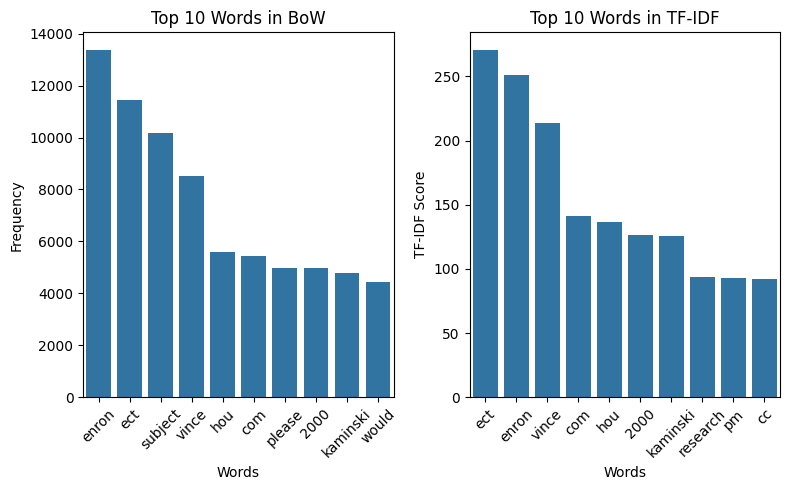

In [46]:
#Plot top 10 words in bow and tfidf
fig, axes = plt.subplots(1,2, figsize = (8,5))
sns.barplot(x= bow_word_freq.head(10).index, y = bow_word_freq.head(10).values, ax=axes[0])
axes[0].set_title("Top 10 Words in BoW")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis = 'x', rotation=45)

# Plot TF-IDF word importance
sns.barplot(x=tfidf_word_importance.head(10).index, y=tfidf_word_importance.head(10).values, ax=axes[1])
axes[1].set_title("Top 10 Words in TF-IDF")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("TF-IDF Score")
axes[1].tick_params(axis='x', rotation=45)
# Show the plots
plt.tight_layout()
plt.show()

Why Does It Look Similar?
We are using Enron email dataset, which is very different from typical spam email datasets. 

1. Dataset is very domain-specific
Words like enron, ect, hou, kaminski, com are company-specific tokens and dominate nearly every email.

These words are both frequent and appear across many emails — BoW counts them, and TF-IDF doesn’t penalize them enough because they are consistently used.

2. TF-IDF can still highlight frequent words
TF-IDF doesn’t always exclude frequent words; it reduces their importance if they appear in many documents, but if your documents are short and highly similar, TF-IDF may not differentiate much.

3. Low diversity in vocabulary
Many Enron emails are corporate in tone and vocabulary. So rare and meaningful terms (like "win", "prize", "lottery" you'd expect in spam) may not exist in this data.

Key take away:
Similar-looking graphs mean:
- The dataset has dominant keywords that appear frequently and are considered important by both methods.

- TF-IDF may not be providing enough contrast here, because the data doesn’t contain enough distinctive rare terms.

Always we should analyze the nature of our dataset — TF-IDF shines when there's semantic richness and noise, like in spam datasets.

For homogeneous datasets, BoW and TF-IDF can often look and perform similarly.

# 4. Building the classifier model

Why Naïve Bayes for Text Classification? Naïve Bayes uses Bayes' Theorem:

#### 𝑃(Class∣Words)∝𝑃(Word∣Class)⋅𝑃(Class)

Let’s say you want to classify whether a message is spam or not.

Here are two example messages:

Message A: "win money now"

Message B: "meeting at 3pm"

Naïve Bayes will do:

#### Step 1: Calculate prior
How likely is any message to be spam or ham?

e.g., P(spam) = 0.3, P(ham) = 0.7

#### Step 2: Look at word probabilities
Let’s say from your dataset you learned:<br>
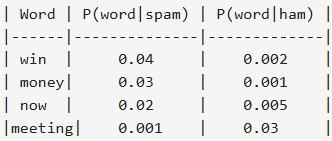

#### Step 3: Calculate the total probability
For Message A: "win money now"

P(spam∣A)∝P(spam)⋅P(win∣spam)⋅P(money∣spam)⋅P(now∣spam)<br>
P(ham∣A)∝P(ham)⋅P(win∣ham)⋅P(money∣ham)⋅P(now∣ham)<br>

Whichever is higher, that’s the predicted class.

In simple terms:
It calculates the probability that an email is spam or ham based on the words it contains.

“Naïve” because it assumes that all words are independent of each other — which is rarely true, but works surprisingly well in practice for text data!

In [47]:
#Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
#Assign the target column
y = pd.to_numeric(df['spam'])
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64


In [49]:
#Split the Data
# For BoW
X_train_bow, X_test_bow, y_train, y_test = train_test_split(bow_model, y, test_size=0.2, random_state=42)

# For TF-IDF
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tfidf_model, y, test_size=0.2, random_state=42)


In [50]:
#BOW model
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

print("BoW Model Results:")
print(classification_report(y_test, y_pred_bow, target_names=["Ham", "Spam"]))

BoW Model Results:
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       856
        Spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [51]:
#tfidf model
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("TF-IDF Model Results:")
print(classification_report(y_test, y_pred_tfidf, target_names=["Ham", "Spam"]))


TF-IDF Model Results:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       856
        Spam       0.99      0.90      0.94       290

    accuracy                           0.97      1146
   macro avg       0.98      0.95      0.96      1146
weighted avg       0.97      0.97      0.97      1146



### Key Insights

- BOW Model<br>
  Accuracy = 99% <br>
  Precision = 97%<br>
  Recall = 99%<br>
  This means that BOW model is performing well. From the total predictions it made, It classifying 97% of the spam messages correctly (slight risk of hams being classified as spam 3%), and out of total spam emails which model classified as spams were 99% times correct (which means it can identify spams well).

##### Why?

BoW counts the frequency of words like "win", "free", "prize", which are strongly tied to spam.

These word frequencies are very effective for simple probabilistic models like Naïve Bayes.

- TDIDF Model<br>
  Accuracy = 97%<br>
  Precision = 99%<br>
  Recall = 90%<br>
  This means that TFIDF model's performance is less whin compared to BOW model. From the total predictions it made, It classifying 99% of the spam messages correctly(only 1% hams getting miss classified), and out of total spams which model classified as spams were only 90% times correct (which means it misses some spam messages and wrongly classify them as ham).
  
##### Why lower recall?

TF-IDF down-weights common spam words (like "win", "free", "money") if they appear in many spam emails (gives less importance to those words).

That’s usually good to reduce noise — but with Naïve Bayes, it hurts recall, because NB relies on frequency counts to make strong predictions.

##### In a nutshell:
Naïve Bayes works best with BoW because it relies on frequency counts, not importance scores. TF-IDF can hurt recall with NB because it downweights key spammy words. However, TF-IDF is often more powerful with Logistic Regression, SVM, or deep models, which can learn the importance of rare features.

##### When to perfer each?
| Scenario                                       | Prefer BoW (NB)                     | Prefer TF-IDF (NB)                  |
| ---------------------------------------------- | ----------------------------------- | ----------------------------------- |
| We care about **detecting all spam**          | Good (High recall)                  | Not good (Misses some spam)         |
| We care about **not mislabeling ham**         | Slight risk of false positives      | Good - High precision               |
| We want a **strong baseline (consider both)** | Good                                | not optimal with NB                 |
| We can try **Logistic Regression or SVM next**|                                     | TF-IDF works better with LR/SVM     |

  

### Can We Use Logistic Regression for Text Classification?
Yes, Logistic Regression is a strong candidate for text classification.
Even though it's traditionally used for numerical features, it works well with sparse, high-dimensional data — just like TF-IDF or BoW outputs.

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
logreg_bow = LogisticRegression(max_iter=1000)
logreg_bow.fit(X_train_bow, y_train)

y_pred_bow_lr = logreg_bow.predict(X_test_bow)

print("Logistic Regression on BoW:")
print(classification_report(y_test, y_pred_bow_lr, target_names=["Ham", "Spam"]))


Logistic Regression on BoW:
              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       856
        Spam       0.99      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [54]:
logreg_tfidf = LogisticRegression(max_iter=1000)
logreg_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf_lr = logreg_tfidf.predict(X_test_tfidf)

print("Logistic Regression on TF-IDF:")
print(classification_report(y_test, y_pred_tfidf_lr, target_names=["Ham", "Spam"]))


Logistic Regression on TF-IDF:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       856
        Spam       0.99      0.93      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146



### Compared to Naïve Bayes

| Model                  | Accuracy | Precision (Spam) | Recall (Spam) | F1 (Spam) |
| ---------------------- | -------- | ---------------- | ------------- | --------- |
| Naïve Bayes (BoW)      | 0.99     | 0.97             | 0.99 ✅        | 0.98 ✅    |
| Naïve Bayes (TF-IDF)   | 0.97     | 0.99             | 0.90 ❗        | 0.94      |
| Logistic Reg. (BoW)    | 0.99 ✅   | 0.99 ✅           | 0.98 ✅        | 0.98 ✅    |
| Logistic Reg. (TF-IDF) | 0.98     | 0.99             | 0.93          | 0.96      |


### Final Insights:
Best Performing Overall:
Logistic Regression on BoW — balances precision, recall, and F1 with highest overall accuracy.

Why It Works So Well:
- BoW preserves raw frequency, which helps LR pick up patterns (without downweighting strong spam signals like “free”, “win”).
- LR learns actual weights — so it handles word correlation and predictive strength better than Naïve Bayes.

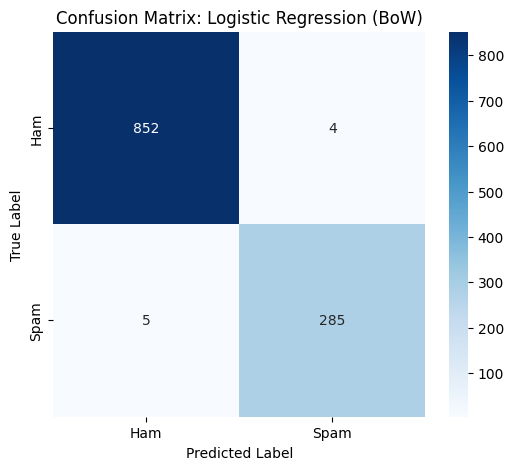

Top 10 Spammy Words:
           word    weight
29075  software  1.206095
8418      click  0.951178
22796    online  0.811886
32886    viagra  0.808385
19271      life  0.784676
16258      http  0.757679
19663      love  0.752804
28325       sex  0.735356
27778      save  0.680822
14227      free  0.641552

Top 10 Hammy Words:
                 word    weight
32960           vince -2.460696
12531           enron -1.447959
30987          thanks -1.380102
26724        research -0.960120
23562        password -0.915595
9105   congratulation -0.882370
21135           model -0.845535
33955           would -0.836734
902              2000 -0.788868
5454         attached -0.785227


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bow_lr)
labels = ["Ham", "Spam"]

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Logistic Regression (BoW)")
plt.show()

# Top Predictive Words from Logistic Regression
#    (features with largest positive weights → spam; largest negative → ham)
feature_names = bow_vectorizer.get_feature_names_out()
coeffs = logreg_bow.coef_[0]

# Assemble into a DataFrame
df_feats = pd.DataFrame({
    "word": feature_names,
    "weight": coeffs
})

# Top 10 spammy words
top_spam = df_feats.nlargest(10, "weight")
print("Top 10 Spammy Words:")
print(top_spam)

# Top 10 hammy words
top_ham = df_feats.nsmallest(10, "weight")
print("\nTop 10 Hammy Words:")
print(top_ham)


### Lets try enesmble method as we have 2 models
##### What Are Ensemble Methods?
- Ensembles combine the strengths of multiple models to make better predictions.
- Instead of relying on one model (like just Naïve Bayes or just Logistic Regression), you combine several models and let them “vote” or “collaborate.”
  
##### Types of ensemble methods

| Method                              | What it does                                                                     | Best for                                    |
| ----------------------------------- | -------------------------------------------------------------------------------- | ------------------------------------------- |
| **Bagging** (Bootstrap Aggregating) | Trains many models on different subsets of data, then averages                   | Reducing **variance** (e.g., Random Forest) |
| **Boosting**                        | Trains models sequentially, each correcting previous mistakes                    | Reducing **bias** (e.g., AdaBoost, XGBoost) |
| **Voting**                          | Combines predictions from different models (e.g., LR + NB + SVM)                 | Quick wins with different models            |
| **Stacking**                        | Uses another model to learn how to best combine predictions from multiple models | Power users (meta-modeling)                 |

##### Most Common in Text Classification: Voting Ensemble
We can use:
- A hard vote (majority wins)
- A soft vote (average predicted probabilities)

Example:
We combine:

Naïve Bayes (good recall)

Logistic Regression (good precision)

Hard Voting:
If 2 out of 3 say “spam”, it’s spam.

Soft Voting:
Each model gives a spam probability (e.g., 0.8, 0.6, 0.7) → average = 0.7 → predict spam.

In [56]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[
    ('nb', model_bow),
    ('lr', logreg_bow)
], voting='soft')  # or 'hard'

ensemble.fit(X_train_bow, y_train)
y_pred = ensemble.predict(X_test_bow)
print("Ensemble Voting Classifier results:")
print(classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))

Ensemble Voting Classifier results:
              precision    recall  f1-score   support

         Ham       1.00      0.99      0.99       856
        Spam       0.97      0.99      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



The results seem to be pretty much similar to logistic regression with bow model, hence lets keep it simple with the logistic regression model alone

### Exporting Model and vectorizer

In [58]:
import joblib

In [63]:
# Save your trained model
joblib.dump(logreg_bow, r"C:\Users\karth\Machine_Learning\spamDetection\models\logreg_bow.pkl")

# Save your vectorizer
joblib.dump(bow_vectorizer, r"C:\Users\karth\Machine_Learning\spamDetection\vectorizer\bow_vectorizer.pkl")


['C:\\Users\\karth\\Machine_Learning\\spamDetection\\vectorizer\\bow_vectorizer.pkl']